# Simulation introduction

Here i assume you have a basic understanding of 
- How to define a numpy array in 1 or 2 dimensions from various distributions (eg. all ones, random normal or some fraction of -1 and 1's)
- Define a for loop and stop if some condition occurs
- Define a function
- Know how to use numpy to do calculations on numbers and arrays (eg exp and taking sum) 
- know how to read and write from elements of arrays of 1 and 2 dimensions
- Visualize data using matplotlib

If not use "Python introduction.ipynb" is a good place to brush up.

The goal is that you will understand how to apply the Simulation template.

In [9]:
import numpy as np
import matplotlib.pyplot as plt

### Task 1, lets implement the SIR model:

##### Task 1.1: State representation
How can we repesent the population sizes? 

**I choose to use a numpy array of 3 elements, [S, I, R]**

##### Task 1.2: Initialization
Define the function init() which creates the state of 1% infectious, 99% susceptible and 0% recovered (no randomness here)

In [10]:
def init():
    inital_state = np.array([0.99, 0.01, 0.00])
    return inital_state


##### Task 1.3: Stop criterion
Define the function not_done() which returns "true" as long as liss than 90% are recovered

In [11]:
def not_done(state):
    is_not_done = state[2] < 0.9
    return is_not_done

##### Task 1.4: Update step
Later in the course we will show how to discretize a model, but for now, apply the identity:

$$\frac{dx}{dt}=f(x)\implies x_i=x_{i-1}+\Delta t*f(x)$$

As the update on each of the populations, eg. $S\rightarrow S+\Delta t\times(-\beta S I)$

Use this to define the function update.

You will want to add the parameters of the model af function arguments, ie alpha, beta and delta_t

In [12]:
# this function should modify the state, ie not return anything
def update(state, beta, gamma, dt): 
    S, I, R = state
    state[0] += dt * (-beta*S*I)
    state[1] += dt * (beta*S*I - gamma * I)
    state[2] += dt * (gamma * I)

##### Task 1.5: Statistic to track
Define the function calc_stat which returns the size of each of the three populations. If state is defined correctly, this just returns its argument. Very simple :) often this will calculate some mean value.

In [13]:
def calc_stat(state):
    stat = state.copy()
    return stat

##### Task 1.6 Finally, wrap it up
Define the parameters of the model, add them to the function call to "update" and plot the size of each group over time.

Define the parameters to be beta=2, gamma=0.5, dt=0.01

**Note these parameters are slightly changed so that 90% eventually get infected and recover**

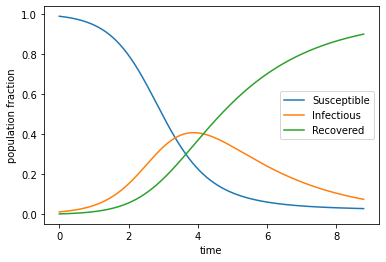

In [21]:
beta = 2
gamma = 0.5
dt = 0.01
    
state = init()
recorded_stats = []
while(not_done(state)):
    update(state, beta, gamma, dt)
    recorded_stats.append(calc_stat(state))
recorded_stats = np.array(recorded_stats)

plt.plot(np.arange(len(recorded_stats))*dt, recorded_stats)
plt.xlabel("time")
plt.ylabel("population fraction")
plt.legend(["Susceptible", "Infectious", "Recovered"])

### Task 2: 2d Array SIR model

Now, we want to add a bit of array complexity into the mix (like basically all problems in the rest of the course)

Now, we want to modify the model to have serveral populations which only interact with their neighboors (Let's say they are kommunes). So we have NxN sites which each have their own S, I and R fraction. 

##### Task 2.1: How should the new data structure look?
Hint: if "state" is 3xNxM dimensional, state[0] is a NxM array. 

##### Task 2.2: Update initialization function
New initialization: to add a bit of randomness, generate the NxN from [0-0.01] using np.random.rand(...)\*0.01. Then calculate the susceptible population as 1-infectious. It makes sense for state[0] to be the NxN array of S's, state[1] to be the I's and state[2] to be the R's

##### Task 2.3: Update not_done function
We now stop when any site has more than 99% recovered. Hint, np.max() is useful here

##### Task 2.4: Update "update" function
Change the $I$ in the $-\beta S I$ terms be the sum of the site and the neighboors. To do this, Let I be the NxN array, then we use the function np.roll() as follows:

I_sum = I + np.roll(I, 1, axis=0) + np.roll(I, -1, axis=0) + np.roll(I, 1, axis=1) + np.roll(I, -1, axis=1)

This "rolls" the array to the left, then to the right, then up and then down.

##### Task 2.5: Update calc_stat function
Calculate the mean suceptibility, infectionsness and recovered fraction across all NxN groups.

#### Task 2.6: Finalize
Run this simulation with the same parameters as before, and for N choose 50 (can be usefull setting to a lower number for debugging)

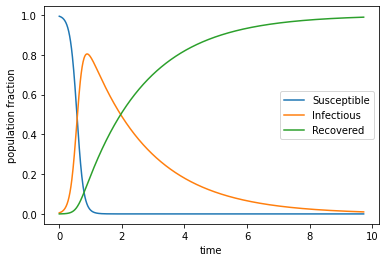

In [42]:
def init(N):
    inital_I = np.random.rand(1, N,N) * 0.01
    initial_state = np.concatenate([1-inital_I, inital_I, np.zeros_like(inital_I)])
    return initial_state

def not_done(state):
    is_not_done = np.max(state[2]) < 0.99
    return is_not_done

def update(state, beta, gamma, dt): 
    S, I, R = state
    I_sum = I + np.roll(I, 1, axis=0) + np.roll(I, -1, axis=0) + \
                np.roll(I, 1, axis=1) + np.roll(I, -1, axis=1)
    term1 = beta*S*I_sum
    term2 = gamma * I
    state[0] += dt * -term1
    state[1] += dt * (term1 - term2)
    state[2] += dt * term2
    
def calc_stat(state):
    stat = [state[0].mean(), state[1].mean(), state[2].mean()]
    return stat

beta = 2
gamma = 0.5
dt = 0.01
N = 50
    
state = init(50)
recorded_stats = []
while(not_done(state)):
    update(state, beta, gamma, dt)
    recorded_stats.append(calc_stat(state))
recorded_stats = np.array(recorded_stats)

plt.plot(np.arange(len(recorded_stats))*dt, recorded_stats)
plt.xlabel("time")
plt.ylabel("population fraction")
plt.legend(["Susceptible", "Infectious", "Recovered"])